In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [2]:
# Cargamos los datos.
train_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\train_data.csv')
test_data = pd.read_csv(r'C:\Users\rodri\Desktop\Titanic 2.0\datos\test_data.csv')

De la misma forma que en los anteriores modelos, vamos a usar las mismas variables para entrenar el modelo "Gradient Boosting":

* Survived
* Pclass
* Sex
* Age
* SibSp
* Parch
* Fare_log

In [3]:
# Definimos las columnas predictoras exluyendo las columnas innecesarias y definimos el target.
X = train_data.drop(columns = ['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'TieneCabina'])
y = train_data['Survived']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Creamos el modelo Gradient Boosting.
modelo = GradientBoostingClassifier(n_estimators = 100, random_state = 42)

In [6]:
# Entrenamos el modelo.
modelo.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [7]:
# Hacemos predicciones con el conjunto de validación.
y_val_pred = modelo.predict(X_val)

---

#### Evaluaciones del modelo con los datos de validación.

In [8]:
print('Accuracy en validación:', accuracy_score(y_val, y_val_pred))

Accuracy en validación: 0.8044692737430168


In [9]:
print('Informe de clasificación en validación:\n\n',classification_report(y_val, y_val_pred))

Informe de clasificación en validación:

               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179



In [12]:
print('AUC-ROC en validación:', roc_auc_score(y_val, y_val_pred))

AUC-ROC en validación: 0.7854568854568855


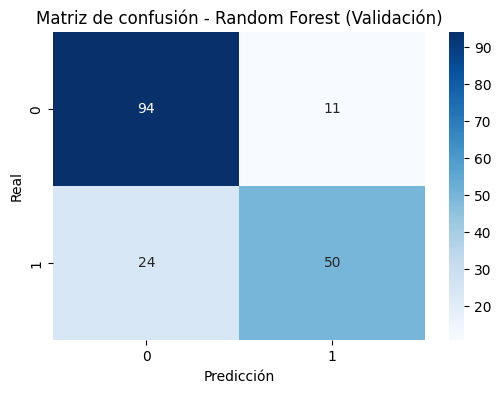

In [14]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Matriz de confusión - Random Forest (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.show()

El modelo de Gradient Boosting nos da un **accuracy** del 80%, igual al modelo de Random Forest, pero con diferencias en las métricas por clase. Este modelo tiene un **f1-score** de 0.84 para la clase 0 y un **f1-score** de 0.74 para la clase 1.

* **Precision** para la clase 0 (no sobrevivió): 0.80
* **Recall** para la clase 0: 0.90 -> El mejor rendimiento para la clase 0 entre los tres modelos.
* **Precision** para la clase 1 (sobrevivió): 0.82
* **Recall** para la clase 1: 0.68 -> Menor recall de los 3 modelos.

El **AUC-ROC** de 0.79 nos indica un rendiemiento similar al de Random Forest, pero el modelo tuvo más errores clasificando a los sobrevivientes (24 incorrectamente clasificados) según la matriz de confusión.

Si bien, el modelo de Gradient Boosting es efectivo para detectar a los pasajeros que no sobrevivieron (mayor recall), tiene más problemas para clasificar correctamente a los sobrevivientes, como vemos en el **f1-score** para la clase 1.

---

In [15]:
# Preparamos los datos de prueba.
X_test = test_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked', 'TieneCabina'])

In [16]:
# Hacemos predicciones con los datos de prueba.
X_test_pred = modelo.predict(X_test)

---